# Twitter Tweets Sentiment 👍😐👎

## Importing necessary tools

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from random import randint
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras import layers
from sklearn.preprocessing import LabelBinarizer

## Unzip data
data: https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset


In [2]:
# !unzip "drive/MyDrive/deep learning/zip files/Twitter Tweets Sentiment Dataset.zip" -d "drive/MyDrive/deep learning/data/Twitter Tweets Sentiment Dataset"

## Walk trough dataset

In [3]:
df = pd.read_csv("drive/MyDrive/deep learning/data/Twitter Tweets Sentiment Dataset/Tweets.csv")
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [4]:
df = df.dropna()
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [5]:
#let's find out how many of each class there
df["sentiment"].value_counts()

neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64

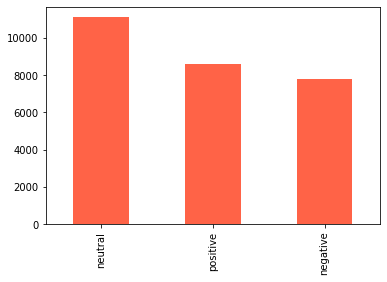

In [6]:
df["sentiment"].value_counts().plot(kind="bar", color='tomato')

In [7]:
for i in range(10):
  num = randint(0, len(df))
  sentence = df["text"][num]
  label = df["sentiment"][num]
  print(f"{label}:\n\t{sentence}")

neutral:
	 yep
positive:
	  I read somewhere they were restoring the name, hope it happens soon
neutral:
	_dee yeah, i bought some when I was making those crispy waffles
neutral:
	 Isn`t he awesome?? There are tons more coming, that was just one of three locations
neutral:
	word is marlon brando gave him 25 cent . . . yeah , tha GODFATHER
neutral:
	bye bye South Beach....u never let me down
neutral:
	Just had some babi pangang. Now off to friends. Tomorrow it`s working time again
negative:
	is sooo stressed about everything I have to do
positive:
	 nice .. I can`t ever get that from my ex!
positive:
	 Haha.. Hey you should check out   Love her/his tweets


## split data to train and test


In [8]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(df["text"].to_numpy(),
                                                                            df["sentiment"].to_numpy(),
                                                                            random_state=42,
                                                                            test_size=0.1)
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(24732, 24732, 2748, 2748)

## Preprocessing
### vectorization(tokenization)

In [9]:
lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
val_labels = lb.fit_transform(val_labels)
train_labels, val_labels

(array([[0, 0, 1],
        [0, 0, 1],
        [1, 0, 0],
        ...,
        [0, 1, 0],
        [0, 0, 1],
        [0, 0, 1]]), array([[0, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        ...,
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0]]))

In [10]:
SEQ_LENGTH = sum([len(i.split()) for i in train_sentences])//len(train_sentences)
SEQ_LENGTH

12

In [11]:
from re import split
text_vectorizer = TextVectorization(max_tokens=10000,
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    output_mode="int",
                                    output_sequence_length=SEQ_LENGTH)

## creating model

In [12]:
embedding = layers.Embedding(input_dim=10000,
                                      output_dim=64,
                                      input_length=SEQ_LENGTH,
                                      name="embedding_1")
embedding

In [13]:
text_vectorizer.adapt(train_sentences)
random_sentence = random.choice(train_sentences)
print(f"original sentence:\n\t{random_sentence}\nvectorized sentence:\n\t{text_vectorizer([random_sentence])}\nembedded sentence:\n\t{embedding(text_vectorizer([random_sentence]))}")

original sentence:
	Yay my friend Glen is here. Now i`m like this
vectorized sentence:
	[[ 216    6  253 8436   10   88   32   14   37   30    0    0]]
embedded sentence:
	[[[-0.03110277 -0.01330758 -0.03383029 -0.00600159 -0.0342521
    0.04368881 -0.02024     0.00124577  0.02928175  0.00744385
   -0.00866356  0.02138518  0.0428087   0.0372729  -0.01523215
    0.02592495  0.03401678  0.04360704 -0.00341929 -0.00467843
    0.00254903  0.03448036  0.02104035 -0.01352658 -0.01188558
   -0.02534717 -0.0408116  -0.02065067  0.04372059 -0.00136667
    0.01783191 -0.03514541  0.00953441 -0.01628549  0.00104789
    0.01018012  0.03794882 -0.01101596 -0.02589196 -0.00603502
   -0.0409821  -0.02064189 -0.00353545 -0.0471881  -0.03329255
   -0.03718376  0.00927017  0.04738073  0.03656883  0.00684609
   -0.0297838  -0.03349813 -0.03369614  0.02716741  0.03263204
   -0.02992407 -0.00305359 -0.00094334  0.02729524 -0.02041771
   -0.02069961 -0.01999833 -0.02212605 -0.00496538]
  [ 0.01550556 -0.030

In [14]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64)(x)
x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(3, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs, name="LSTM_model")

In [15]:
model.compile(loss="categorical_crossentropy",
              metrics="categorical_accuracy",
              optimizer="Adam")

In [16]:
model.fit(train_sentences,
          train_labels,
          validation_data=(val_sentences, val_labels),
          epochs=5,
          batch_size=32)

Epoch 1/5
773/773 [==============================] - 26s 15ms/step - loss: 0.8492 - categorical_accuracy: 0.6048 - val_loss: 0.7568 - val_categorical_accuracy: 0.6659
Epoch 2/5
773/773 [==============================] - 10s 13ms/step - loss: 0.6551 - categorical_accuracy: 0.7259 - val_loss: 0.7765 - val_categorical_accuracy: 0.6663
Epoch 3/5
773/773 [==============================] - 10s 13ms/step - loss: 0.5632 - categorical_accuracy: 0.7737 - val_loss: 0.8317 - val_categorical_accuracy: 0.6503
Epoch 4/5
773/773 [==============================] - 10s 13ms/step - loss: 0.4846 - categorical_accuracy: 0.8115 - val_loss: 0.9063 - val_categorical_accuracy: 0.6386
Epoch 5/5
773/773 [==============================] - 10s 13ms/step - loss: 0.4020 - categorical_accuracy: 0.8445 - val_loss: 0.9539 - val_categorical_accuracy: 0.6339


hmmmmm...
its little bit better than guessing😁😂
but where did i make mistake...?🤔